# ランダムウォーク

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
%matplotlib inline
sns.set('poster', 'whitegrid', 'dark', font_scale=1, rc={"lines.linewidth": 2, 'grid.linestyle': '-'})

## 1次元ランダムウォーク

In [2]:
%%time
K = 100
X = np.cumsum(np.insert(np.random.choice([-1, 1], size=K), 0, 0))

Wall time: 2 ms


In [3]:
%%time
np.random.seed(218)
S1 = {0: 1, 1: -1}
K = 100
X1 = np.zeros(K)
for n in range(1, K):
    X1[n] = X1[n-1] + S1[np.random.randint(2)]

Wall time: 0 ns


Text(0, 0.5, '$x_n$')

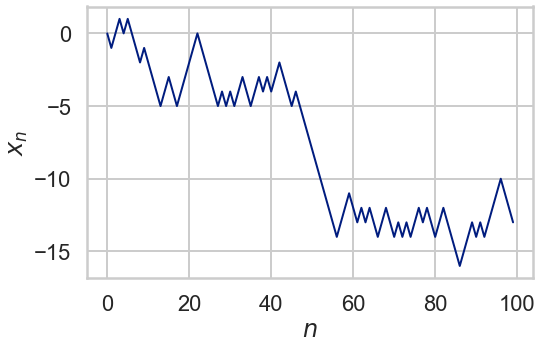

In [4]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(X1, '-')
ax.set_xlabel('$n$')
ax.set_ylabel('$x_n$')

In [5]:
%%time
np.random.seed(57)
S = {0:-1, 1:1}
K = 500
Samples = 10000
A = np.zeros((Samples, K))
for s in range(Samples):
    X = np.zeros(K)
    for n in range(1, K):
        X[n] = X[n-1] + S[np.random.randint(2)]
    A[s] = np.array([abs(X[n]) for n in range(K)])

Wall time: 15.9 s


期待値の時間変化

In [6]:
E = np.average(A, axis=0)

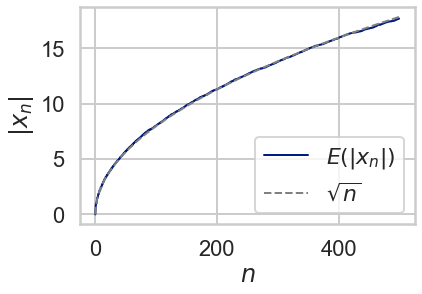

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('$n$')
ax.set_ylabel('$|x_n|$')
ax.plot(E, '-', label='$E(|x_n|)$')
ax.plot(np.linspace(0,500,500), np.sqrt(np.linspace(0,500,500))*np.sqrt(2/np.pi), '--', c='gray', label='$\sqrt{n}$')
ax.legend()

## ２次元ランダムウォーク

In [8]:
%%time
e = np.array([[0,1], [1,0]])
S = {0:-e[0], 1:e[0], 2:-e[1], 3:e[1]}
K = 500
X = np.zeros((K,2))
for n in range(1, K):
    X[n] = X[n-1] + S[np.random.randint(4)]

Wall time: 8 ms


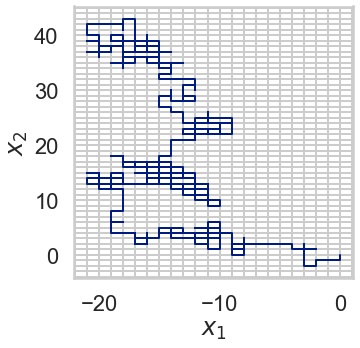

In [9]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.grid(which='minor')
ax.plot(X[:,0],X[:,1], '-')